In [ ]:
#NOTE FOR MARKERS:
# small_3 and small_4 (without/with labels resp.) were the datasets that were passed from this section of preprocessing to the next 
# (i.e. external to this notebook)
# This notebook was worked on by s1887468 and s1890666

In [1]:
#PACKAGE IMPORTS

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Modules & utilities
import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import itertools
import collections
import matplotlib.ticker as mtick

In [2]:
#Functions

def nz(value):

    '''
    Convert None to int zero else return value.
    '''

    if value == None:
        return 0
    return value

In [3]:
#Raw data initial exploration
#Load small dataset
#Performs basic dataset inspection

small_raw = pd.read_table('../data/feature/orange_small_train.data').replace('\\', '/')
display(small_raw.shape) #shows the shape of the full data set (number of rows and columns)
display(small_raw.describe()) #shows the dataset statistics
display(small_raw.head(5))
print(small_raw.info())

(50000, 230)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,0.0,702.000000,1.487000e+03,...,1.241000e+03,1241.000000,0.0,702.000000,702.00000,1241.000000,21022.000000,333.000000,0.0,0.0
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,NaN,48.145299,3.926057e+05,...,7.777380e+04,8.460919,NaN,3.299145,16.54416,167.368477,270.142137,22007.045192,NaN,NaN
std,40.709951,0.141933,4270.193518,1.275481,6.441259e+05,2685.693668,6.326053,NaN,154.777855,9.280896e+05,...,2.016188e+05,46.973777,NaN,8.781967,60.22303,113.980072,86.707692,29085.146490,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2732.670000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,861.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,197.640000,270.000000,12668.940000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.187425e+05,1428.000000,7.000000,NaN,46.000000,2.628630e+05,...,4.881000e+04,8.000000,NaN,6.000000,14.00000,252.960000,330.000000,29396.340000,NaN,NaN
max,680.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1200.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 230 entries, Var1 to Var230
dtypes: float64(191), int64(1), object(38)
memory usage: 87.7+ MB
None


In [4]:
#Percentage of missing records
no_record_count=small_raw.isnull().sum().sum()
total_records = small_raw.shape[0] *small_raw.shape[1]
missing_data_percent = round(no_record_count/total_records*100,2)
print("Percentage of missing records: " + str(missing_data_percent)) 

Percentage of missing records: 69.78


In [5]:
#Checks and removes empty columns
small=small_raw.dropna(how='all', axis=1) #drop empty columns
removed_columns = small_raw.shape[1] - small.shape[1]  
print("Removed empty columns: " + str(removed_columns)) #confirm how many columns were removed

#Check if there are duplicate columns in the remaining dataset:
dup_count =small.columns.duplicated() #array of true/false for duplicated/non-duplicated columns
d=collections.Counter(dup_count)
print("Number of duplicate columns:"+str(nz(d.get(True)))) #use none to zero function

print(small.info())

Removed empty columns: 18
Number of duplicate columns:0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 212 entries, Var1 to Var229
dtypes: float64(173), int64(1), object(38)
memory usage: 80.9+ MB
None


In [6]:
#Show dataset statistics again to double check:
pd.set_option('display.max_columns', 230)
display(small.describe()) #shows the dataset statistics
display(small.head(5))

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,Var12,Var13,Var14,Var16,Var17,Var18,Var19,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var33,Var34,Var35,Var36,Var37,Var38,Var40,Var41,Var43,Var44,Var45,Var46,Var47,Var49,Var50,Var51,Var53,Var54,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var168,Var170,Var171,Var172,Var173,Var174,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190
count,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,702.000000,1.487000e+03,1240.000000,558.000000,44461.000000,1240.000000,1487.000000,1579.000000,1579.000000,1579.000000,44471.000000,44991.000000,1487.000000,42770.000000,44991.000000,1487.000000,1487.000000,44989.000000,702.000000,702.000000,8.470000e+02,1241.000000,44991.000000,1.241000e+03,1.579000e+03,4.499100e+04,1241.000000,702.000000,1241.000000,44991.000000,344.000000,1241.000000,702.000000,1241.000000,702.000000,3747.000000,7.020000e+02,1241.000000,6.460000e+02,50000.000000,7.020000e+02,8.200000e+02,1487.000000,847.000000,558.000000,694.000000,238.000000,44461.000000,694.000000,1487.000000,1241.000000,1.487000e+03,1.487000e+03,1129.000000,27620.000000,50000.00000,44461.000000,1241.000000,4.499100e+04,702.000000,44991.000000,1.487000e+03,4.447100e+04,1579.000000,44991.000000,1240.000000,44991.000000,7.020000e+02,702.000000,1083.000000,646.000000,702.000000,1129.000000,1.710000e+02,1487.000000,2.762000e+04,1.241000e+03,1241.000000,1487.000000,5.580000e+02,1579.000000,702.000000,873.000000,451.000000,1487.000000,820.000000,820.000000,1.579000e+03,1487.000000,7.020000e+02,42770.000000,702.000000,1.129000e+03,44991.000000,5.000000e+04,1.241000e+03,820.000000,702.000000,1.579000e+03,171.0,44471.000000,1487.000000,702.000000,1241.000000,44991.000000,1.579000e+03,4.446100e+04,36080.000000,1083.000000,1083.000000,702.000000,1240.000000,7.020000e+02,44991.000000,4.499100e+04,4.499100e+04,1579.000000,6.940000e+02,702.000000,1579.000000,1.487000e+03,44461.000000,702.000000,44991.000000,44471.000000,1579.000000,1487.000000,1487.000000,1487.000000,4.277000e+04,1.579000e+03,847.000000,1579.000000,4.499100e+04,7.020000e+02,1579.00000,694.000000,1129.000000,873.000000,1241.000000,44991.000000,1579.000000,1.241000e+03,4.499100e+04,1579.000000,8.730000e+02,1487.000000,702.000000,1241.000000,1.083000e+03,1487.000000,44991.000000,1579.000000,1240.000000,1.241000e+03,646.000000,1579.000000,7.020000e+02,44991.000000,1.579000e+03,1.241000e+03,1241.000000,702.000000,702.00000,1241.000000,21022.000000,333.000000
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,48.145299,3.926057e+05,8.625806,16.071685,1249.688401,0.741935,120.239275,11.393287,7.215959,0.245092,234.518225,290.245382,7.535306,4.507926,96.827010,0.070612,0.028245,224.507669,0.022792,7.435897,1.270050e+05,1.173247,0.716810,1.595539e+05,6.485221e+05,2.579107e+06,13.962933,26.653846,4.157937,0.166833,7256.127907,16.796132,2.188034,0.091861,35.690883,43652.006725,6.543265e+05,4.789686,8.796467e+04,3.512311,1.640613e+05,4.145965e+05,9.538668,40.462810,5.096774,40.201729,26526.471067,14.868896,96.841499,0.016812,85.596293,3.531945e+06,4.003406e+05,137.059345,4.190659,66.64108,103.658127,6.498791,1.490154e+06,10.410256,0.534707,5.442104e+04,1.030841e+05,2.426219,20.0

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,Var12,Var13,Var14,Var16,Var17,Var18,Var19,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var33,Var34,Var35,Var36,Var37,Var38,Var40,Var41,Var43,Var44,Var45,Var46,Var47,Var49,Var50,Var51,Var53,Var54,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var168,Var170,Var171,Var172,Var173,Var174,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN,NaN,464.0,580.0,NaN,14.0,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3570.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.076907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,35.0,NaN,1350864.0,NaN,0.0,NaN,7333.11,NaN,5.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,NaN,168.0,117625.60,NaN,NaN,NaN,NaN,NaN,1175.0,NaN,NaN,NaN,6.0,NaN,720.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,1212385.0,69134.0,NaN,NaN,NaN,NaN,NaN,185.0,NaN,0.0,9.0,NaN,NaN,NaN,NaN,397579.0,NaN,NaN,NaN,1812252.0,NaN,NaN,NaN,NaN,NaN,NaN,142.0,NaN,NaN,38418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,462.0,NaN,NaN,bZkvyxLkBI,RO12,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,NaN,NaN,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,168.0,210.0,NaN,2.0,24.0,NaN,NaN,353.52,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4764966.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.408032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,26,0.0,NaN,2872928.0,NaN,3.0,NaN,151098.90,NaN,25.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,40.0,-356411.60,NaN,NaN,NaN,NaN,NaN,590.0,NaN,NaN,NaN,72.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4136430.0,357038.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,9.0,NaN,NaN,NaN,NaN,278334.0,NaN,NaN,NaN,10439160.0,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,238572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CEat0G8rTN,RO12,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,NaN,904.0,NaN,NaN,NaN,NaN,NaN,1212.0,1515.0,NaN,26.0,816.0,NaN,NaN,220.08,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5883894.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.599658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,518.0,NaN,1675776.0,NaN,0.0,NaN,16211.58,NaN,40.0,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.0,NaN,NaN,336.0,405104.00,NaN,NaN,NaN,NaN,NaN,3230.0,NaN,NaN,NaN,114.0,NaN,5967.0,-28.0,NaN,NaN,NaN,NaN,NaN,0.0,3478905.0,248932.0,NaN,NaN,NaN,NaN,NaN,800.0,

In [7]:
#build a summary table indicating column data types and missing data statistics
#Check the number of unique entries per column:
pd.set_option('display.max_rows', 230)
unique_count=small.nunique() 
unique_count.name = 'unique_count'
#Check the number of non-null values
valid_count = small.shape[0] - small.isna().sum()
valid_count.name = 'valid_count'
#Check the percentage of non-null values
valid_percent = round(100-small.isna().sum()*100/small.shape[0],2)
valid_percent.name = 'valid_percent'
#Check column data type
d_type = small.dtypes
d_type.name ='d_type'
#print(valid_percent)
summary = pd.concat([valid_count, valid_percent, unique_count, d_type], axis=1)
display(summary)

,valid_count,valid_percent,unique_count,d_type
Var1,702,1.40,18,float64
Var2,1241,2.48,2,float64
Var3,1240,2.48,146,float64
Var4,1579,3.16,4,float64
Var5,1487,2.97,571,float64
Var6,44471,88.94,1486,float64
Var7,44461,88.92,8,float64
Var9,702,1.40,100,float64
Var10,1487,2.97,534,float64
Var11,1240,2.48,5,float64


In [8]:
#Display a summary of column data types
summary.groupby('d_type').count()

,valid_count,valid_percent,unique_count
d_type,,,
int64,1,1,1
float64,173,173,173
object,38,38,38


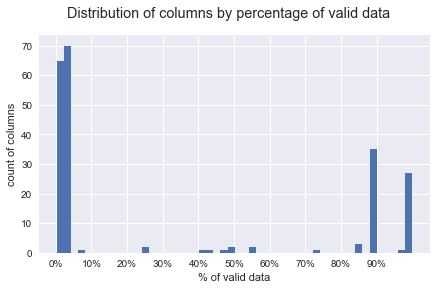

In [30]:
# Plots distribution of columns by percent of valid data
# Figure 2 in the report

fig = plt.figure(1, (7,4))
fig.suptitle("Distribution of columns by percentage of valid data")
ax = fig.add_subplot(1,1,1)
ax.hist(summary['valid_percent'], bins=50)
fmt = '%.0f%%' 
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
ax.xaxis.set_ticks(np.arange(0, 100, 10))
plt.xlabel('% of valid data')
plt.ylabel('count of columns')
plt.show()

In [31]:
#cumulative column count by % valid data bin
bins = np.arange(0, 101, 5)
cut_ = pd.cut(summary['valid_percent'], bins=bins)
summary['valid_data_bins'] = cut_
z=summary.groupby('valid_data_bins').count()
z['cumulative_count'] = z['valid_count'].cumsum(axis = 0)
z = z.drop(z.iloc[:,0:4], 1)
display(z)

,cumulative_count
valid_data_bins,
"(0, 5]",135
"(5, 10]",136
"(10, 15]",136
"(15, 20]",136
"(20, 25]",136
"(25, 30]",138
"(30, 35]",138
"(35, 40]",138
"(40, 45]",140


In [9]:
#Isolating integer variable
for var in small.columns:
    if small[var].dtype == int:
        print(var)

In [10]:
#Replacing object columns with categorical for further processing 

small_copy = small.copy(deep=True)
for var in small_copy.columns:
    if small_copy[var].dtype == 'object':
        cat_col = small_copy[var].astype('category')
        small_copy.loc[:,var] = cat_col
        #print('Categories for ',var, ': ',small_copy[var].cat.categories)

In [11]:
#Returns top 10 value counts for each cateogircal variable
cat_indexes = []
for i in range(191,230,1):
    cat_indexes.append('Var'+str(i))
    
cat_indexes.remove('Var209')

for i in range(0,38,1):
    print(small_copy[cat_indexes[i]].value_counts()[:10])
    
#Interesting variables denoted below; only single value variables were processed
#1 value Vars:191, 201, 213, 215, 224
#2 value Vars: 208, 211, 218
#3 value Vars:194,205
#Very skewed distriburion: 195, 196, 203, 210, 219

r__I    1083
Name: Var191, dtype: int64
qFpmfo8zhV    385
DHeq9ayfAo    384
zKnr4RXktW    380
HYTrjIK12c    379
8I1r4RXXnK    379
75lr4RXktW    377
1GdOj1KXzC    376
2jirEyXktW    373
CxSr4RXktW    369
vAsgUHXM47    368
Name: Var192, dtype: int64
RO12                                  35964
2Knk1KF                                7271
AERks4l                                2243
g62hiBSaKg                              580
e6CkoqApVR                              524
LrdZy8QqgUfkVShG                        458
rEUOq2QD1qfkRr6qpua                     455
eSGpMwS8zSGgq_trOpckZ5                  444
onTuEhrJJQy_H3IHkZku5AFczhYGqxJ890      260
w9ygS99Qp_                              181
Name: Var193, dtype: int64
SEuy    12567
lvza      176
CTUH       41
Name: Var194, dtype: int64
taul                47958
LfvqpCtLOY            866
CiJDdr4TQ0rGERIS      544
ev6I                  179
CuXi4je               159
b_3Q                   81
I9xt3GDRhUK7p          61
I9xt3GMcxUnBZ          30
I9xt3GBDK

In [12]:
#Model potential column removal with set thresholds of null values
#Threshold should be a proportion of how many values needed to keep column
#i.e. if we only want columns with 70% non-null values or more, threshold should be 0.7
def removenull(data, threshold):
    datacopy = data.copy(deep=True)
    datacopy2 = datacopy.dropna(axis=1, thresh=int((datacopy.shape[0])*threshold))
    print('Removed ', data.shape[1]-datacopy2.shape[1], 'columns using threshold ', '{0:.2f}'.format(threshold))
    return datacopy2

#Checks how many columns we would remove for each threshold
#We already reach 50% of columns removed if we set only a 5% threshold
print('Original number of columns: ', small_copy.shape[1])
for i in np.arange(0,0.05,0.01):
    removenull(small_copy, i)
for i in np.arange(0.05,1,0.05):
    removenull(small_copy, i)

Original number of columns:  212
Removed  0 columns using threshold  0.00
Removed  6 columns using threshold  0.01
Removed  55 columns using threshold  0.02
Removed  114 columns using threshold  0.03
Removed  135 columns using threshold  0.04
Removed  135 columns using threshold  0.05
Removed  136 columns using threshold  0.10
Removed  136 columns using threshold  0.15
Removed  136 columns using threshold  0.20
Removed  136 columns using threshold  0.25
Removed  138 columns using threshold  0.30
Removed  138 columns using threshold  0.35
Removed  138 columns using threshold  0.40
Removed  140 columns using threshold  0.45
Removed  143 columns using threshold  0.50
Removed  143 columns using threshold  0.55
Removed  145 columns using threshold  0.60
Removed  145 columns using threshold  0.65
Removed  145 columns using threshold  0.70
Removed  146 columns using threshold  0.75
Removed  146 columns using threshold  0.80
Removed  146 columns using threshold  0.85
Removed  184 columns using

In [26]:
#Loads in all three targets into a separate dataframe, checks for errors
app_labels = pd.read_csv(os.path.join(os.getcwd(), '../data/label/orange_small_train_appetency.csv'), header=None)
churn_labels = pd.read_csv(os.path.join(os.getcwd(), '../data/label/orange_small_train_churn.csv'), header=None)
upsell_labels = pd.read_csv(os.path.join(os.getcwd(), '../data/label/orange_small_train_upselling.csv'), header=None)
small_labels = pd.concat([app_labels, churn_labels, upsell_labels], axis=1)
small_labels.columns = ['Appetency', 'Churn','Upselling']
print(small_labels.head(10))

   Appetency  Churn  Upselling
0         -1     -1         -1
1         -1      1         -1
2         -1     -1         -1
3         -1     -1         -1
4         -1     -1         -1
5         -1     -1         -1
6         -1     -1         -1
7         -1     -1         -1
8         -1     -1         -1
9         -1     -1         -1


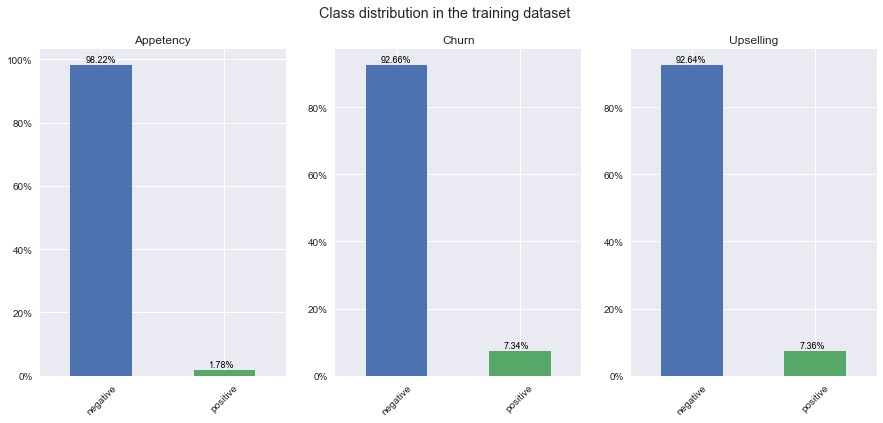

In [28]:
#Plot class lable distribution for each target variable
#Figure 1 in report

fig = plt.figure(figsize = (15,6))
fig.suptitle("Class distribution in the training dataset")
classNames = ['negative','positive']
tick_marks = np.arange(len(classNames))

a1 = fig.add_subplot(1,3,1)
a1.set_title("Appetency")

a=small_labels['Appetency'].value_counts() #lable count by lable value
da = a/sum(a)*100 #label distribution
a1 = da.plot('bar') #plot bar chart for class labels
a1.yaxis.set_major_formatter(mtick.PercentFormatter())#format y-axis as persent
plt.xticks(tick_marks, classNames, rotation=45)
#add data lables to the columns
for i in a1.patches:
    # get_x pulls left or right; get_height pushes up or down
    a1.text(i.get_x()+.12, i.get_height()+1, \
            str(round(i.get_height(), 2))+'%', fontsize=9,
                color='black')

a2 = fig.add_subplot(1,3,2)
a2.set_title("Churn")
c=small_labels['Churn'].value_counts() #lable count by lable value
dc = c/sum(c)*100 #label distribution
a2 = dc.plot('bar') #plot bar chart for class labels
a2.yaxis.set_major_formatter(mtick.PercentFormatter())#format y-axis as persent
plt.xticks(tick_marks, classNames, rotation=45)
#add data lables to the columns
for i in a2.patches:
    # get_x pulls left or right; get_height pushes up or down
    a2.text(i.get_x()+.12, i.get_height()+1, \
            str(round(i.get_height(), 2))+'%', fontsize=9,
                color='black')

a3 = fig.add_subplot(1,3,3)
a3.set_title("Upselling")
u=small_labels['Upselling'].value_counts() #lable count by lable value
du = u/sum(u)*100 #label distribution
a3 = du.plot('bar') #plot bar chart for class labels
a3.yaxis.set_major_formatter(mtick.PercentFormatter())#format y-axis as persent
plt.xticks(tick_marks, classNames, rotation=45)
#add data lables to the columns
for i in a3.patches:
    # get_x pulls left or right; get_height pushes up or down
    a3.text(i.get_x()+.12, i.get_height()+1, \
            str(round(i.get_height(), 2))+'%', fontsize=9,
                color='black')

plt.show()

In [14]:
# Select Float columns, create binary features for indicators of missing values, replace NaN with mean
# output to small_1

small_1= small_copy.loc[:, small_copy.dtypes == np.float64]
for col in small_1.columns:
    small_1[col+"_missing"] = small_1[col].isnull().astype(int)
    small_1[col].fillna((small_1[col].mean()), inplace=True)



C:\Users\judmk\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\judmk\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [15]:
print(small_1.info())
display(small_1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 346 entries, Var1 to Var190_missing
dtypes: float64(173), int32(173)
memory usage: 99.0 MB
None


,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,Var12,Var13,Var14,Var16,Var17,Var18,Var19,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var33,Var34,Var35,Var36,Var37,Var38,Var40,Var41,Var43,Var44,Var45,Var46,Var47,Var49,Var50,Var51,Var53,Var54,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var74,Var75,Var76,Var77,Var78,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,...,Var69_missing,Var70_missing,Var71_missing,Var72_missing,Var74_missing,Var75_missing,Var76_missing,Var77_missing,Var78_missing,Var80_missing,Var81_missing,Var82_missing,Var83_missing,Var84_missing,Var85_missing,Var86_missing,Var87_missing,Var88_missing,Var89_missing,Var90_missing,Var91_missing,Var92_missing,Var93_missing,Var94_missing,Var95_missing,Var96_missing,Var97_missing,Var98_missing,Var99_missing,Var100_missing,Var101_missing,Var102_missing,Var103_missing,Var104_missing,Var105_missing,Var106_missing,Var107_missing,Var108_missing,Var109_missing,Var110_missing,Var111_missing,Var112_missing,Var113_missing,Var114_missing,Var115_missing,Var116_missing,Var117_missing,Var118_missing,Var119_missing,Var120_missing,Var121_missing,Var122_missing,Var123_missing,Var124_missing,Var125_missing,Var126_missing,Var127_missing,Var128_missing,Var129_missing,Var130_missing,Var131_missing,Var132_missing,Var133_missing,Var134_missing,Var135_missing,Var136_missing,Var137_missing,Var138_missing,Var139_missing,Var140_missing,Var142_missing,Var143_missing,Var144_missing,Var145_missing,Var146_missing,Var147_missing,Var148_missing,Var149_missing,Var150_missing,Var151_missing,Var152_missing,Var153_missing,Var154_missing,Var155_missing,Var156_missing,Var157_missing,Var158_missing,Var159_missing,Var160_missing,Var161_missing,Var162_missing,Var163_missing,Var164_missing,Var165_missing,Var166_missing,Var168_missing,Var170_missing,Var171_missing,Var172_missing,Var173_missing,Var174_missing,Var176_missing,Var177_missing,Var178_missing,Var179_missing,Var180_missing,Var181_missing,Var182_missing,Var183_missing,Var184_missing,Var186_missing,Var187_missing,Var188_missing,Var189_missing,Var190_missing
0,11.487179,0.004029,425.298387,0.125396,238793.32885,1526.000000,7.000000,48.145299,3.926057e+05,8.625806,16.071685,184.000000,0.741935,120.239275,11.393287,7.215959,0.245092,464.000000,580.000000,7.535306,14.000000,128.00000,0.070612,0.028245,166.560000,0.022792,7.435897,127004.950413,1.173247,0.00000,1.595539e+05,6.485221e+05,3.570000e+03,13.962933,26.653846,4.157937,0.000000,7256.127907,16.796132,2.188034,0.091861,35.690883,43652.006725,654326.5,4.789686,87964.667183,4.076907,164061.333333,4.145965e+05,9.538668,40.46281,5.096774,40.201729,26526.471067,9.000000,96.841499,0.016812,85.596293,3.531945e+06,4.003406e+05,137.059345,4.190659,35.000000,6.498791,1.350864e+06,10.410256,0.000000,54421.039005,7333.110000,2.426219,5.00000,42.527419,12.000000,286892.974359,5.424501,68.947368,5.517028,0.019943,91.372896,170679.444444,2.127774,98671.065858,109771.411765,4.646253,0.915938,21295.060932,26.279924,0.887464,19.804124,28765.797421,18.782784,100.789024,67.192683,38164.132362,5.086079,193779.51567,104.00000,6.683761,284824.232416,168.000000,1.176256e+05,6.081326e+05,37.745122,0.064103,129837.29449,3.0,1175.000000,31.642233,6.951567,0.043513,6.000000,223079.148828,720.000000,8.00000,28.092336,...,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1
1,11.487179,0.004029,425.298387,0.125396,238793.32885,525.000000,0.000000,48.145299,3.926057e+05,8.625806,16.071685,0.000000,0.741935,120.239275,11.

In [16]:
#create correlation matrix
corr_matrix = small_1.loc[:, small_1.dtypes == np.float64].corr().abs()

In [18]:
#Set a maximum cap for correlation 
corr_cap = 0.8 #max acceptable correlation

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than max acceptable
to_drop1 = [column for column in upper.columns if any(upper[column] > corr_cap)]  #float columns
to_drop2=[str(i+'_missing') for i in to_drop1] #binary indicator columns
to_drop=to_drop1+to_drop2 #all columns to remove

print('Total highgly correlated columns to remove:'+str(len(to_drop1)))
print(to_drop1)

Total highgly correlated columns to remove:48
['Var9', 'Var22', 'Var25', 'Var43', 'Var60', 'Var61', 'Var62', 'Var63', 'Var66', 'Var68', 'Var71', 'Var77', 'Var83', 'Var88', 'Var89', 'Var91', 'Var96', 'Var99', 'Var101', 'Var103', 'Var104', 'Var105', 'Var107', 'Var112', 'Var115', 'Var120', 'Var121', 'Var123', 'Var127', 'Var128', 'Var129', 'Var132', 'Var145', 'Var148', 'Var151', 'Var156', 'Var157', 'Var159', 'Var160', 'Var164', 'Var166', 'Var170', 'Var174', 'Var178', 'Var179', 'Var184', 'Var186', 'Var187']


Float columns kept:125


,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var10,Var11,Var12,Var13,Var14,Var16,Var17,Var18,Var19,Var21,Var23,Var24,Var26,Var27,Var28,Var29,Var30,Var33,Var34,Var35,Var36,Var37,Var38,Var40,Var41,Var44,Var45,Var46,Var47,Var49,Var50,Var51,Var53,Var54,Var56,Var57,Var58,Var59,Var64,Var65,Var67,Var69,Var70,Var72,Var74,Var75,Var76,Var78,Var80,Var81,Var82,Var84,Var85,Var86,Var87,Var90,Var92,Var93,Var94,Var95,Var97,Var98,Var100,Var102,Var106,Var108,Var109,Var110,Var111,Var113,Var114,Var116,Var117,Var118,Var119,Var122,Var124,Var125,Var126,Var130,Var131,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var142,Var143,Var144,Var146,Var147,Var149,Var150,Var152,Var153,Var154,Var155,Var158,Var161,Var162,Var163,Var165,Var168,Var171,Var172,...,Var13_missing,Var14_missing,Var16_missing,Var17_missing,Var18_missing,Var19_missing,Var21_missing,Var23_missing,Var24_missing,Var26_missing,Var27_missing,Var28_missing,Var29_missing,Var30_missing,Var33_missing,Var34_missing,Var35_missing,Var36_missing,Var37_missing,Var38_missing,Var40_missing,Var41_missing,Var44_missing,Var45_missing,Var46_missing,Var47_missing,Var49_missing,Var50_missing,Var51_missing,Var53_missing,Var54_missing,Var56_missing,Var57_missing,Var58_missing,Var59_missing,Var64_missing,Var65_missing,Var67_missing,Var69_missing,Var70_missing,Var72_missing,Var74_missing,Var75_missing,Var76_missing,Var78_missing,Var80_missing,Var81_missing,Var82_missing,Var84_missing,Var85_missing,Var86_missing,Var87_missing,Var90_missing,Var92_missing,Var93_missing,Var94_missing,Var95_missing,Var97_missing,Var98_missing,Var100_missing,Var102_missing,Var106_missing,Var108_missing,Var109_missing,Var110_missing,Var111_missing,Var113_missing,Var114_missing,Var116_missing,Var117_missing,Var118_missing,Var119_missing,Var122_missing,Var124_missing,Var125_missing,Var126_missing,Var130_missing,Var131_missing,Var133_missing,Var134_missing,Var135_missing,Var136_missing,Var137_missing,Var138_missing,Var139_missing,Var140_missing,Var142_missing,Var143_missing,Var144_missing,Var146_missing,Var147_missing,Var149_missing,Var150_missing,Var152_missing,Var153_missing,Var154_missing,Var155_missing,Var158_missing,Var161_missing,Var162_missing,Var163_missing,Var165_missing,Var168_missing,Var171_missing,Var172_missing,Var173_missing,Var176_missing,Var177_missing,Var180_missing,Var181_missing,Var182_missing,Var183_missing,Var188_missing,Var189_missing,Var190_missing
0,11.487179,0.004029,425.298387,0.125396,238793.32885,1526.000000,7.0,392605.656355,8.625806,16.071685,184.0,0.741935,120.239275,11.393287,7.215959,0.245092,464.000000,7.535306,14.000000,0.070612,0.028245,166.56,0.022792,7.435897,127004.950413,1.173247,0.0,159553.853344,648522.148195,3570.0,13.962933,26.653846,0.0,7256.127907,16.796132,2.188034,0.091861,35.690883,43652.006725,654326.5,4.789686,87964.667183,4.076907,164061.333333,414596.520976,26526.471067,9.0,0.016812,3.531945e+06,400340.558171,4.190659,35.0,6.498791,1350864.0,0.0,54421.039005,7333.110000,2.426219,42.527419,12.0,286892.974359,5.424501,0.019943,170679.444444,2.127774,98671.065858,109771.411765,0.915938,21295.060932,0.887464,28765.797421,38164.132362,193779.51567,104.00000,6.683761,284824.232416,117625.60,608132.609186,0.064103,129837.29449,3.0,1175.000000,0.043513,223079.148828,720.0,8.00000,0.495968,4.064877e+06,1212385.0,69134.0,199.920443,110690.905588,3.82906,0.001267,181541.37189,185.0,1.128205,0.0,9.000000,2.781439,1.701412,397579.000000,157687.615579,8.314123,1812252.0,1.538221e+06,0.80114,1.896907,3.374288,336016.762288,38418.0,28842.355097,332.938575,367451.723236,9.744452,...,0,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,0,0,1,1,0,0,1,1,1,1,1,0,1,0,0,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1
1,11.487179,0.004029,425.298387,0.125396,238793.32885,525.000000,0.0,392605.656355,8.625806,16.071685,0.0,0.741935,120.239275,11.393287,7.215959,0.245092,168.000000,7.535306,2.000000,0.070612,0.028245

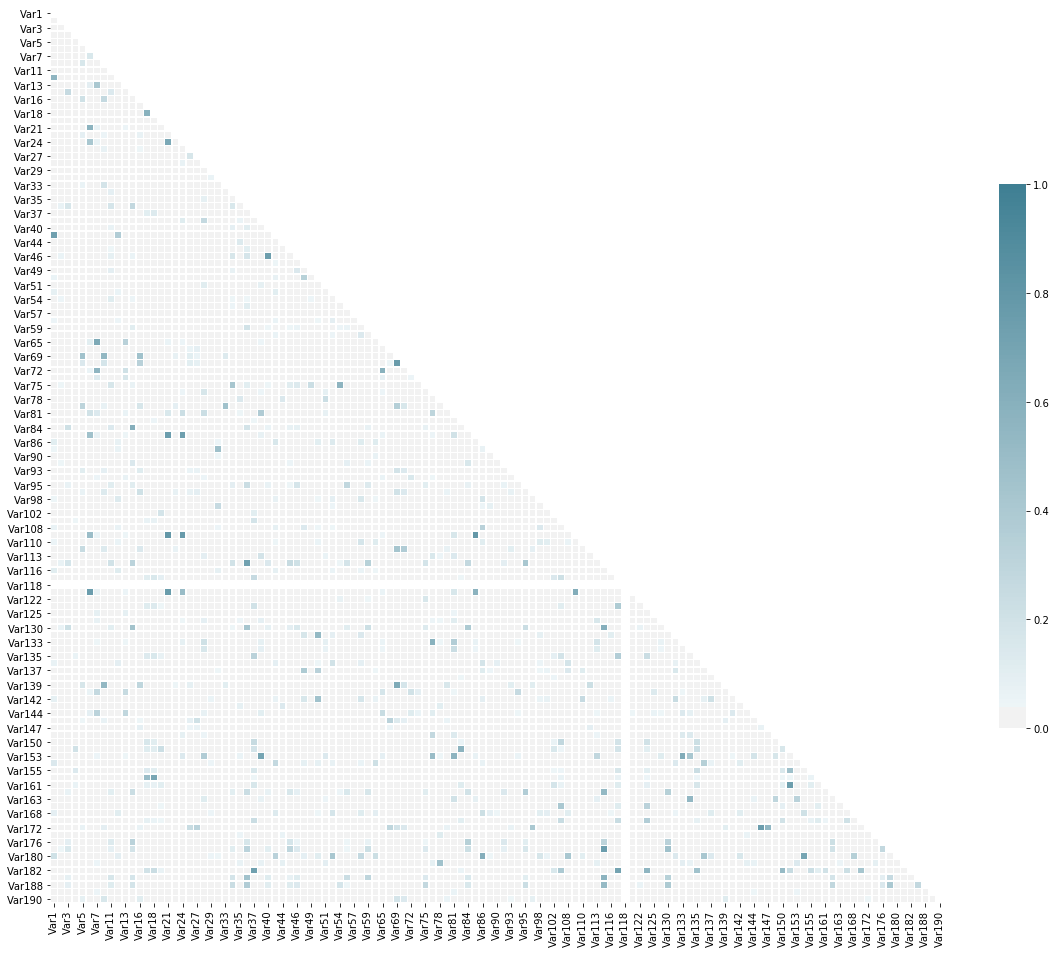

In [19]:
#Drop correlated columns, show df head and the matrix

small_2=small_1.drop(small_1[to_drop], axis=1)
c=(small_2.loc[:, small_1.dtypes == np.float64]).shape

print('Float columns kept:'+str(c[1]))
display(small_2.head(5))

#Visualise the correlation matrix
corr_matrix2 = small_2.loc[:, small_1.dtypes == np.float64].corr().abs()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix2, mask=mask, cmap=cmap, vmax=1, center=0,annot=False, annot_kws={"size": 8}, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [17]:
#Adds cateogircal columns back on to transformed numerical features with binary columns
categorical_columns = small_copy.select_dtypes(include=['category'])
small_3 = pd.concat([small_2,categorical_columns], axis=1)
print(small_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 288 entries, Var1 to Var229
dtypes: category(38), float64(125), int64(125)
memory usage: 101.0 MB
None


In [18]:
#Adds labels onto dataset if needed
small_4 = pd.concat([small_3, small_labels], axis=1)
print(small_4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 291 entries, Var1 to Upselling
dtypes: category(38), float64(125), int64(128)
memory usage: 102.2 MB
None


In [ ]:
#NOTE FOR MARKERS:
# small_3 and small_4 were the datasets that were passed from this section of preprocessing to the next 
# (i.e. external to this notebook)
# All code below this point was used purely to produce graphs for the report

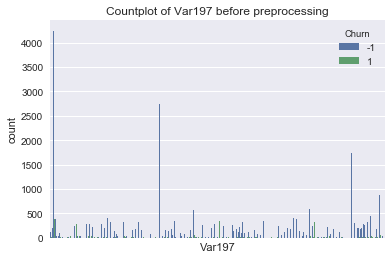

In [20]:
#Produces before plot for categorical preprocessing
sns.set(style='darkgrid')
hues = ['Appetency', 'Churn', 'Upselling']
sns.countplot(x='Var197', hue='Churn', data=small_4)
plt.xticks([])
plt.title('Countplot of Var197 before preprocessing')
plt.show()

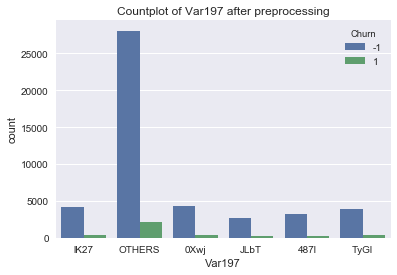

In [21]:
#Produces after plot for categorical preprocessing
#Actual preprocessing was not done in this notebook; this simulates the process for graphing purpose

small_5 = small_4.copy(deep=True)
values = small_5['Var197'].values.unique()

#Implements MISSING and OTHERS strategy
for valu in values:
    if valu == '0Xwj' or valu == 'lK27' or valu == 'TyGl' or valu == '487l' or valu == 'JLbT':
        continue
    else:
        small_5['Var197'] = small_5['Var197'].replace(to_replace=valu, value='OTHERS')
        
sns.countplot(x='Var197', hue='Churn', data=small_5)
plt.title('Countplot of Var197 after preprocessing')
plt.show()

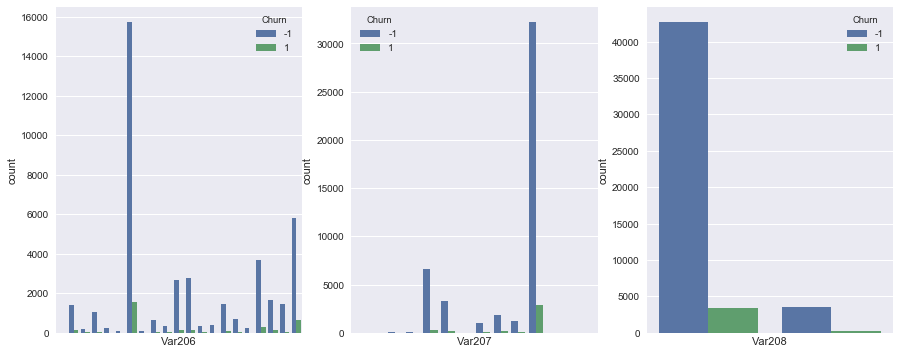

In [23]:
#Creates plot of examples of categorical distributions

cat_indexes = []
for i in range(191,230,1):
    cat_indexes.append('Var'+str(i))
    
cat_indexes.remove('Var209')

plt.figure(figsize=(15,6))
plt.tight_layout(h_pad=50)

plt.subplot(1,3,1)
sns.countplot(x=cat_indexes[15], hue='Churn', data=small_4)
plt.xticks([])

plt.subplot(1,3,2)
sns.countplot(x=cat_indexes[16], hue='Churn', data=small_4)
plt.xticks([])

plt.subplot(1,3,3)
sns.countplot(x=cat_indexes[17], hue='Churn', data=small_4)
plt.xticks([])
plt.show()